<a href="https://colab.research.google.com/github/alpet25/twofive-twentyfive/blob/main/PYIM_Assign_3_PYIM009ONL005_Alfapetra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read TSV File and Transform it Into Dataframe

In [3]:
import numpy
import gzip
import csv
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount= True)

Mounted at /content/drive


In [5]:
%cd "/content/drive/MyDrive/Colab Notebooks/Text dataset"

/content/drive/MyDrive/Colab Notebooks/Text dataset


In [6]:
!ls

amazon_reviews_us_Watches_v1_00.tsv	students.csv
amazon_reviews_us_Watches_v1_00.tsv.gz


In [7]:
#a_file = csv.reader("/content/drive/MyDrive/Colab Notebooks/Text dataset/amazon_reviews_us_Watches_v1_00.tsv", "rt")
#contents = a_file.read()

#print(contents)

In [8]:
import csv
tsv_file = open("/content/drive/MyDrive/Colab Notebooks/Text dataset/amazon_reviews_us_Watches_v1_00.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
data_file=[]
for row in read_tsv:
  data_file.append(row)
data_file2 = pd.DataFrame(data_file)
data_file2.columns = data_file2.iloc[0]
data_file3=data_file2.drop(0)
data_file3

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31,None,None,None,None,None,None,None
2,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31,None,None,None,None,None,None,None
3,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31,None,None,None,None,None,None,None
4,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31,None,None,None,None,None,None,None
5,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960233,US,39508379,REH8UQZAXQS40,B00005OT9I,2153632,Xhilaration&#174; Silver Dial Bangle Watch,Watches,2,17,17,N,N,Great prize - but size??,It's a great watch - but you don't have a chan...,2001-12-13,None,None,None,None,None,None,None
960234,US,44704251,RJ14QPZEOI9P8,B00005QEM6,903687397,Armitron Men's Titanium 3 Eye Sport Analog Chr...,Watches,5,9,10,N,N,A very classy watch!,"Well worth the price. This is a light weight, ...",2001-11-08,None,None,None,None,None,None,None
960235,US,40571775,R2B1G5650WWFCE,B00005QEME,252821780,Men's Timex Internet Messenger Sport Watch,Watches,5,3,16,N,N,This is a great watch,"Dear Targeteers,<BR>This watch is exelent. it ...",2001-11-06,None,None,None,None,None,None,None
960236,US,44474855,R2MMGPUWXXOFI2,B00004YK0H,118389241,Energizer 393 Button Cell Battery,Watches,4,0,0,N,N,Now watt a minute here.,"In the old days, the common hearing battery in...",2001-04-05,None,None,None,None,None,None,None


See example data

In [9]:
df = data_file3.copy()
def print_plot(index):
  example = df[df.index == index][['review_body', 'product_title']].values[0]
  if len(example) >0:
    print(example[0])
    print('Product:', example[1])
print_plot(10)

Great quality and build.<br />The motors are really silent.<br />After fiddling with the settings my watches are always charged and ready to use.
Product: Heiden Quad Watch Winder in Black Leather


Check data description

In [10]:
df.describe()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,960237,960237,960237,960237,960237,960237,960237,960237,960237,960237,960237,960237,960237,960237,960233,33,33,33,33,33,33,33
unique,1,719539,960237,149661,141821,143441,1,5,284,309,2,2,456739,873429,4177,3,3,1,2,24,33,30
top,US,42418272,R10CNLX7ECKFSI,B000T9VK56,688076877,SE JT6216 21-Piece Watch Repair Kit,Watches,5,0,0,N,Y,Five Stars,good,2014-12-29,0,0,N,Y,Five Stars,watch broken within 3 months and only one of t...,2015-02-25
freq,960237,407,1,4390,4474,4390,960237,571192,647561,580843,958492,830831,133930,2750,2707,24,23,33,32,9,1,4


In [11]:
data_file3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960237 entries, 1 to 960237
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960237 non-null  object
 1   customer_id        960237 non-null  object
 2   review_id          960237 non-null  object
 3   product_id         960237 non-null  object
 4   product_parent     960237 non-null  object
 5   product_title      960237 non-null  object
 6   product_category   960237 non-null  object
 7   star_rating        960237 non-null  object
 8   helpful_votes      960237 non-null  object
 9   total_votes        960237 non-null  object
 10  vine               960237 non-null  object
 11  verified_purchase  960237 non-null  object
 12  review_headline    960237 non-null  object
 13  review_body        960237 non-null  object
 14  review_date        960233 non-null  object
 15  None               33 non-null      object
 16  None               3

In [12]:
df.star_rating.value_counts()

5    571192
4    172787
1     85130
3     79118
2     52010
Name: star_rating, dtype: int64

In [13]:
df['review_body']

1         Absolutely love this watch! Get compliments al...
2              I love this watch it keeps time wonderfully.
3                                                 Scratches
4         It works well on me. However, I found cheaper ...
5         Beautiful watch face.  The band looks nice all...
                                ...                        
960233    It's a great watch - but you don't have a chan...
960234    Well worth the price. This is a light weight, ...
960235    Dear Targeteers,<BR>This watch is exelent. it ...
960236    In the old days, the common hearing battery in...
960237    I have found that a #393 watch battery is the ...
Name: review_body, Length: 960237, dtype: object

Text Preprocessing

In [14]:
pip install nltk

In [15]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)
def clean_text(text):
  """
      text : a string

      return: modified initial string
  """
  text = text.lower() #lowercase text
  text = REPLACE_BY_SPACE_RE.sub(' ', text) #replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space
  text = BAD_SYMBOLS_RE.sub(" ", text)
  text = text.replace('x', '')
  text = text.replace('<br />', ' ')
  text = text.replace('.<br />', ' ')

  text = ' '.join(word for word in text.split() if word not in STOPWORDS)
  return text
df['review_body'] = df["review_body"].apply(clean_text)
df['review_body'] = df['review_body'].str.replace('\d+', '')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'under', "couldn't", 'them', 'have', "that'll", 'doing', 'very', 'before', 'himself', 'so', 'which', 'had', "mightn't", 'they', 'whom', 'below', 'any', 'most', "you're", 're', 'a', "shan't", 'mustn', 'are', 'that', 't', 'only', 'wasn', 'against', 'up', 'few', "doesn't", 'as', 'during', 'no', 'just', 'wouldn', 'themselves', 'your', 'how', 'all', 'in', 'be', 'has', 'me', 'our', 'its', 'these', 'did', 'do', 'her', 'to', 'y', 'why', 'then', 'mightn', 'ma', 'not', "haven't", 'you', 'couldn', 'it', 'shouldn', 'if', "mustn't", 'on', 'same', 'into', 'with', 've', 'aren', "weren't", 'ain', 'doesn', "wouldn't", 'haven', 'weren', "don't", 'yourself', "you'd", 'an', "didn't", 'over', 'we', "it's", "won't", 'further', "hadn't", 'through', 'out', 'once', 'here', 'she', 'herself', 'because', 'hers', 'those', 'was', 'the', 'won', 'd', 'am', 'off', 'when', 'm', 'll', 'than', 'too', 'a

In [16]:
df['review_body']

0         absolutely love watch get compliments almost e...
1                         love watch keeps time wonderfully
2                                                 scratches
3         works well however found cheaper prices places...
4         beautiful watch face band looks nice around li...
                                ...                        
960232              great watch chance change size cant fit
960233    well worth price light weight classy looking w...
960234    dear targeteers br watch eelent everything eve...
960235    old days common hearing battery past used take...
960236    found # watch battery size # hearing battery o...
Name: review_body, Length: 960237, dtype: object

In [17]:
print_plot(10)

watch pretty much described looks really like simplicity looks pretty amazing slightly big yet adjust glad big rather small weight good hoping satisfied purchase slightly fence getting one previous fossil watch time gems fall ring around numbers far good one ecuse bad lighting pic
Product: Fossil Women's ES3621 Serena Crystal-Accented Two-Tone Stainless Steel Watch


In [18]:
from keras.preprocessing.text import Tokenizer

In [19]:
#maximum number of words to be used
MAX_NB_WORDS =5000
#Max number of words in each complaint
MAX_SEQUENCE_LENGTH =25
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review_body'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 119745 unique tokens.


In [20]:
X = tokenizer.texts_to_sequences(df['review_body'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (960237, 25)


In [21]:
#Y = pd.get_dummies(df['product_title']).values
#print('Shape of label tensor:', Y.shape)

In [22]:
Y = pd.get_dummies(df['star_rating']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (960237, 5)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(864213, 25) (864213, 5)
(96024, 25) (96024, 5)


In [24]:
from keras.callbacks import EarlyStopping
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
12153/12153 [==============================] - 2555s 210ms/step - loss: 0.8086 - accuracy: 0.6846 - val_loss: 0.7715 - val_accuracy: 0.6969
Epoch 2/5
12153/12153 [==============================] - 2561s 211ms/step - loss: 0.7659 - accuracy: 0.6997 - val_loss: 0.7581 - val_accuracy: 0.7008
Epoch 3/5
12153/12153 [==============================] - 2435s 200ms/step - loss: 0.7496 - accuracy: 0.7055 - val_loss: 0.7532 - val_accuracy: 0.7027
Epoch 4/5
12153/12153 [==============================] - 2238s 184ms/step - loss: 0.7376 - accuracy: 0.7100 - val_loss: 0.7489 - val_accuracy: 0.7042
Epoch 5/5
12153/12153 [==============================] - 2232s 184ms/step - loss: 0.7288 - accuracy: 0.7128 - val_loss: 0.7477 - val_accuracy: 0.7058


In [25]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3001/3001 [==============================] - 43s 14ms/step - loss: 0.7514 - accuracy: 0.7061
Test set
  Loss: 0.751
  Accuracy: 0.706


In [31]:
import matplotlib.pyplot as plt
import numpy as np

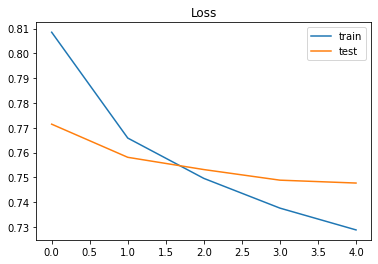

In [33]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

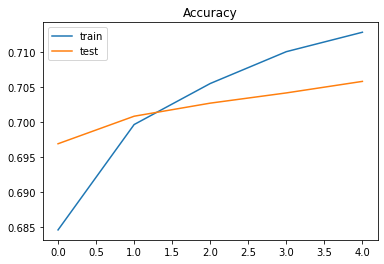

In [34]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

Review test

In [38]:
new_review_body = ['I like this watch, it is a the best product i ever see of a watch, i really love it']
seq = tokenizer.texts_to_sequences(new_review_body)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['1','2','3','4','5']
print(pred, labels[np.argmax(pred)])

[[1.8192998e-04 1.6358378e-04 1.5566349e-03 2.6334953e-02 9.7176290e-01]] 5


In [39]:
new_review_body = ['Damn what is this, i really regret buying this product']
seq = tokenizer.texts_to_sequences(new_review_body)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['1','2','3','4','5']
print(pred, labels[np.argmax(pred)])

[[0.5457634  0.13920075 0.05998066 0.02709893 0.22795635]] 1


In [40]:
new_review_body = ['Well i think this product is not good or bad, just a usual watch that i can use daily']
seq = tokenizer.texts_to_sequences(new_review_body)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['1','2','3','4','5']
print(pred, labels[np.argmax(pred)])

[[0.01755397 0.02159876 0.14886062 0.30783683 0.50414985]] 5


In [41]:
new_review_body = ['For a gift i am not going to recommend this, but for daily use its ok i say']
seq = tokenizer.texts_to_sequences(new_review_body)
padded = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['1','2','3','4','5']
print(pred, labels[np.argmax(pred)])

[[0.00336509 0.00490833 0.03814232 0.1589321  0.79465216]] 5
